In [2]:
import sys
#sys.path.append("C:/Users/tshol/Desktop/Git_Repos/AdaptiveComputation_and_ML/ACML_Group_Project")
#from data.dataset import PoemData
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import urllib
import urllib.request
import random
import pickle
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import torch
import tensorflow 
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import layers, Sequential
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import chardet
import os


2024-05-27 14:40:45.125388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

# Specify the path of the new working directory
new_directory = "/Users/avuzwalerotholi/Desktop"

# Change the current working directory
os.chdir(new_directory)

current_directory = os.getcwd()
file_name = 'human_chat.txt'
file_path = os.path.join(current_directory, file_name)

'''
# Detect the encoding of the file
with open('human_chat.txt', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")'''


with open(file_path, 'r',  encoding= 'utf-8') as file:
    data = file.read()

print(data)

Human 1: Hi!
Human 2: What is your favorite holiday?
Human 1: one where I get to meet lots of different people.
Human 2: What was the most number of people you have ever met during a holiday?
Human 1: Hard to keep a count. Maybe 25.
Human 2: Which holiday was that?
Human 1: I think it was Australia
Human 2: Do you still talk to the people you met?
Human 1: Not really. The interactions are usually short-lived but it's fascinating to learn where people are coming from and what matters to them
Human 2: Yea, me too. I feel like God often puts strangers in front of you, and gives you an opportunity to connect with them in that moment in deeply meaningful ways. Do you ever feel like you know things about strangers without them telling you?
Human 1: what do you mean?
Human 2: I think it's like a 6th sense, often seen as "cold readings" to people, but can be remarkably accurate. I once sat next to a man in a coffee and I felt a pain in my back. I asked the stranger if he had a pain. It turns o

In [4]:
# Split the data by newline character
lines = data.strip().split('\n')

cleaned_lines = []
for line in lines:
    if ':' in line:
        line = line.split(':', 1)[1]  # Extract text after the colon
    cleaned_lines.append(line.strip())

# Join the cleaned lines together
cleaned_text = ' '.join(cleaned_lines).lower()

# Remove punctuation
cleaned_text = cleaned_text.replace(',', '').replace('?', '').replace('!', '').replace('.', '')

print(cleaned_text)

print(f"Number of words: {len(cleaned_text.split())}")

hi what is your favorite holiday one where i get to meet lots of different people what was the most number of people you have ever met during a holiday hard to keep a count maybe 25 which holiday was that i think it was australia do you still talk to the people you met not really the interactions are usually short-lived but it's fascinating to learn where people are coming from and what matters to them yea me too i feel like god often puts strangers in front of you and gives you an opportunity to connect with them in that moment in deeply meaningful ways do you ever feel like you know things about strangers without them telling you what do you mean i think it's like a 6th sense often seen as "cold readings" to people but can be remarkably accurate i once sat next to a man in a coffee and i felt a pain in my back i asked the stranger if he had a pain it turns out that he did in the exact spot and said he pulled a muscle while dancing at a party i had never met the man before and never s

In [5]:
# Assuming cleaned_text is already defined from your preprocessing steps

# Tokenize the cleaned text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])
total_words = len(tokenizer.word_index) + 1

# Convert the cleaned text to sequences of tokens
tokenized_text = tokenizer.texts_to_sequences([cleaned_text])[0]

# Sequence length
sequence_length = 2

# Dataset of input-output pairs
sequences = []
for i in range(sequence_length, len(tokenized_text)):
    seq = tokenized_text[i-sequence_length:i+1]
    sequences.append(seq)

# Use a subset of the data if necessary
# subset_size = 50000  
# sequences = sequences[:subset_size]

# Split into input and output
X = [seq[:-1] for seq in sequences]
y = [seq[-1] for seq in sequences]

print(f"Input sequences (X): {len(X)}")
print(f"Output words (y): {len(y)}")

# Convert input sequences and output words to arrays
X_padded = pad_sequences(X, maxlen=sequence_length, padding='pre')
y_categorical = to_categorical(y, num_classes=total_words)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_categorical, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Input sequences (X): 19549
Output words (y): 19549
Training set size: 9774
Validation set size: 4887
Test set size: 4888


/Users/avuzwalerotholi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.0234 - loss: 8.2439 - val_accuracy: 0.0252 - val_loss: 6.7401
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0320 - loss: 6.4544 - val_accuracy: 0.0415 - val_loss: 6.5517
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0444 - loss: 6.2239 - val_accuracy: 0.0415 - val_loss: 6.5483
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0387 - loss: 6.1577 - val_accuracy: 0.0415 - val_loss: 6.5743
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.0382 - loss: 6.1419 - val_accuracy: 0.0415 - val_loss: 6.6223
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0396 - loss: 6.0576 - val_accuracy: 0.0415 - val_loss: 6.6572
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.0409 - loss: 6.0513 - val_accuracy: 0.0411 - val_loss: 6.6953
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0406 - loss: 6.0431 - val_accuracy: 0

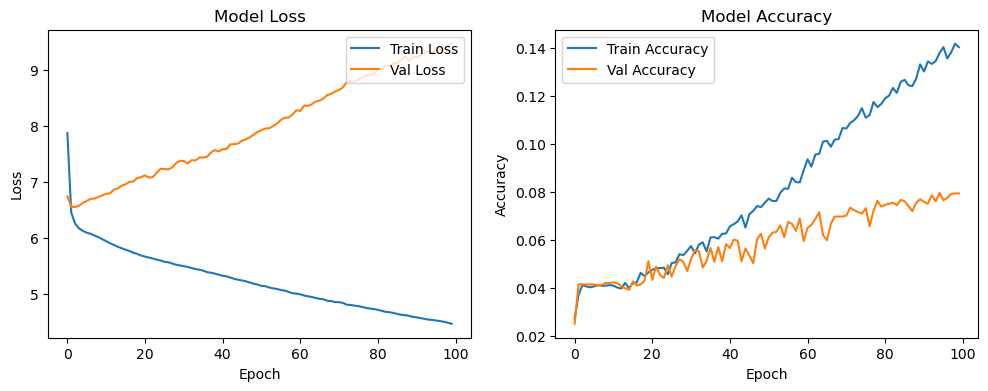

In [6]:
model = Sequential([
    layers.Input(shape=(sequence_length,)),
    layers.Embedding(input_dim=total_words, output_dim=100, input_length=sequence_length),
    layers.LSTM(50, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(50),
    layers.Dropout(0.2),
    layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(total_words, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

Reloading Tuner from my_dir/word_prediction_tuning/tuner0.json
Best hyperparameters: {'embedding_dim': 100, 'num_lstm_layers': 1, 'lstm_units': 30, 'dropout_rate': 0.3, 'num_dense_layers': 1, 'optimizer': 'rmsprop', 'dense_units': 100, 'regularizer': 0.0001}
Epoch 1/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.0389 - loss: 7.5943 - val_accuracy: 0.0415 - val_loss: 6.3746
Epoch 2/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.0430 - loss: 6.3122 - val_accuracy: 0.0415 - val_loss: 6.3342
Epoch 3/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0412 - loss: 6.2543 - val_accuracy: 0.0415 - val_loss: 6.3053
Epoch 4/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0450 - loss: 6.2160 - val_accuracy: 0.0524 - val_loss: 6.2872
Epoch 5/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.0498 - loss: 6.1933 - val_accuracy: 0.0540 - val_loss: 6.2741
Epoch 6/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0477 - loss: 6.1520 - 

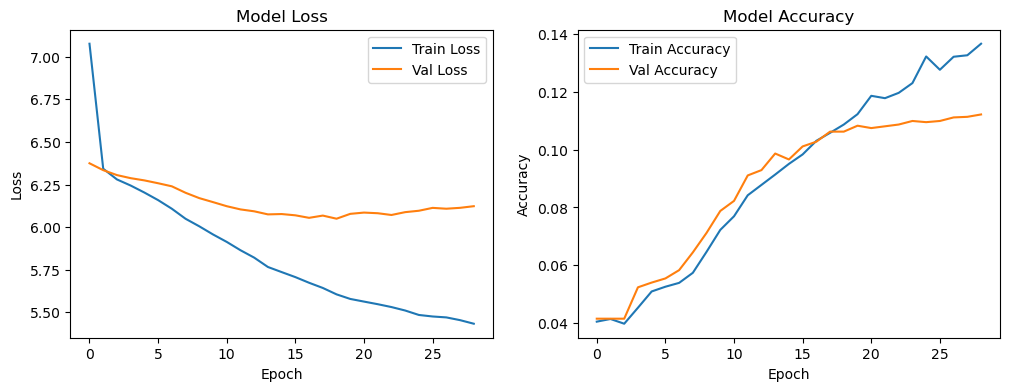

Results summary
Results in my_dir/word_prediction_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 37 summary
Hyperparameters:
embedding_dim: 100
num_lstm_layers: 1
lstm_units: 30
dropout_rate: 0.3
num_dense_layers: 1
optimizer: rmsprop
dense_units: 100
regularizer: 0.0001
Score: 0.12156383693218231

Trial 23 summary
Hyperparameters:
embedding_dim: 50
num_lstm_layers: 2
lstm_units: 30
dropout_rate: 0.3
num_dense_layers: 0
optimizer: rmsprop
dense_units: 100
regularizer: 0.001
Score: 0.1065974310040474

Trial 39 summary
Hyperparameters:
embedding_dim: 50
num_lstm_layers: 2
lstm_units: 30
dropout_rate: 0.5
num_dense_layers: 0
optimizer: rmsprop
dense_units: 200
regularizer: 0.0001
Score: 0.10171044617891312

Trial 38 summary
Hyperparameters:
embedding_dim: 300
num_lstm_layers: 4
lstm_units: 200
dropout_rate: 0.2
num_dense_layers: 1
optimizer: rmsprop
dense_units: 50
regularizer: 0.001
Score: 0.09682345390319824

Trial 09 summary
Hyperparameters:
embedd

In [9]:

def build_model(hp):
    model = Sequential()
    model.add(layers.Input(shape=(sequence_length,)))
    
    model.add(layers.Embedding(
        input_dim=total_words, 
        output_dim=hp.Choice('embedding_dim', values=[50, 100, 200, 300]),
        input_length=sequence_length
    ))
    
    num_lstm_layers = hp.Int('num_lstm_layers', 1, 4)
    for i in range(num_lstm_layers):
        model.add(layers.LSTM(
            units=hp.Choice('lstm_units', values=[10, 20, 30, 50, 100, 150, 200]), 
            return_sequences=(i < num_lstm_layers - 1)
        ))
        model.add(layers.Dropout(rate=hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4, 0.5])))
    
    for _ in range(hp.Int('num_dense_layers', 0, 4)):
        model.add(layers.Dense(
            units=hp.Choice('dense_units', values=[10, 20, 50, 100, 150, 200]), 
            activation='relu', 
            kernel_regularizer=regularizers.l2(hp.Choice('regularizer', values=[0.01, 0.001, 0.0001]))
        ))
        model.add(layers.Dropout(rate=hp.Choice('dropout_rate', values=[0.0,0.1, 0.2, 0.3, 0.4, 0.5])))
    
    model.add(layers.Dense(total_words, activation='softmax'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set up the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=70,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train with each combination of hyperparameters
    directory='my_dir',
    project_name='word_prediction_tuning'
)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Run the tuner search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model with early stopping
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Print the results for each trial
tuner.results_summary()


In [ ]:
# Function to preprocess the input text
def preprocess_input_text(input_text, tokenizer, sequence_length):
    # Tokenize the input text
    tokenized_input = tokenizer.texts_to_sequences([input_text])[0]
    # Pad the tokenized input text
    padded_input = pad_sequences([tokenized_input], maxlen=sequence_length, padding='pre')
    return padded_input

# Function to predict the next word
def predict_next_word(input_text, model, tokenizer, sequence_length):
    # Preprocess the input text
    padded_input = preprocess_input_text(input_text, tokenizer, sequence_length)
    # Predict the probabilities for the next word
    predicted_probs = model.predict(padded_input, verbose=0)[0]
    # Get the token ID with the highest probability
    predicted_token_id = np.argmax(predicted_probs)
    # Convert the token ID to the word
    predicted_word = tokenizer.index_word[predicted_token_id]
    return predicted_word

# Example usage
input_sequence = "hi are you feeling fine"
predicted_word = predict_next_word(input_sequence, best_model, tokenizer, sequence_length)
print(f"Input sequence: '{input_sequence}'")
print(f"Predicted next word: '{predicted_word}'")